In [85]:
import pandas as pd
import re
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
text_df = pd.read_pickle('test_src/text_df_test.pkl')
meta_df = pd.read_pickle('test_src/meta_df_test.pkl')
categories_df = pd.read_pickle('test_src/categories_df_test.pkl')
reduced_categories_df = pd.read_pickle('test_src/reduced_categories_df_test.pkl')
expanded_categories_df = pd.read_pickle('test_src/expanded_categories_df_test.pkl')

In [97]:
# Remove the 1st row of each df that's there to hold the original shape.
text_df.drop(text_df.index[0], inplace=True)
meta_df.drop(meta_df.index[0], inplace=True)
categories_df.drop(categories_df.index[0], inplace=True)
reduced_categories_df.drop(reduced_categories_df.index[0], inplace=True)
expanded_categories_df.drop(expanded_categories_df.index[0], inplace=True)

In [98]:
# Make sure the categories are encoded correctly
reduced_categories_df.fillna(0, inplace=True)
reduced_categories_df = reduced_categories_df.astype(int, inplace=True)
expanded_categories_df.fillna(0,inplace=True)
expanded_categories_df = expanded_categories_df.astype(int, inplace=True)

In [109]:
# Clean up the text and abstract datasets
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

text_df['text'] = text_df['text'].apply(clean_text)
text_df['length'] = text_df['text'].apply(len)
text_df = text_df[text_df['length'] != 0]

meta_df['abstract'] = meta_df['abstract'].apply(clean_text)


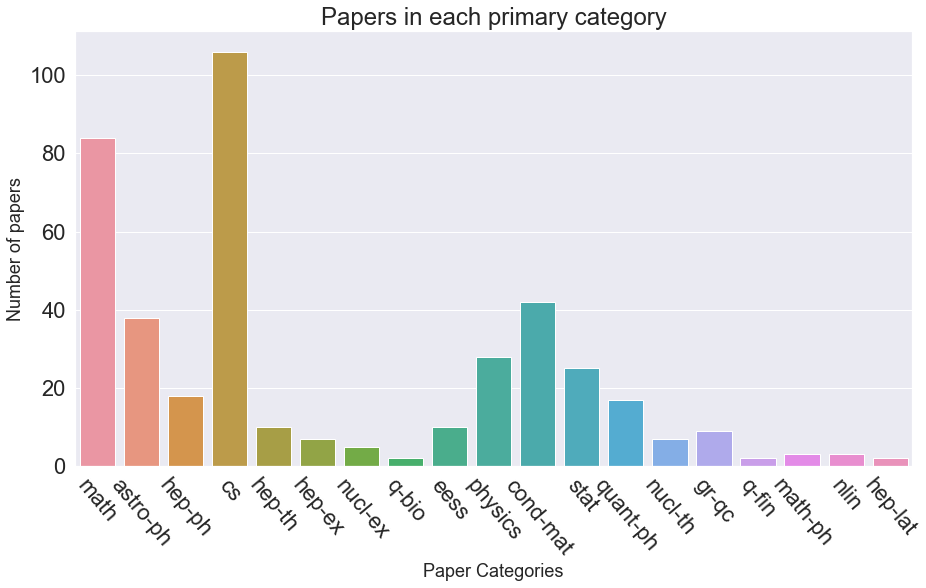

In [57]:
categories = list(reduced_categories_df.iloc[:,1:].columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, reduced_categories_df.iloc[:,1:].sum())

plt.title("Papers in each primary category", fontsize=24)
plt.ylabel('Number of papers', fontsize=18)
plt.xlabel('Paper Categories', fontsize=18)
plt.xticks(rotation=-50)

plt.show()

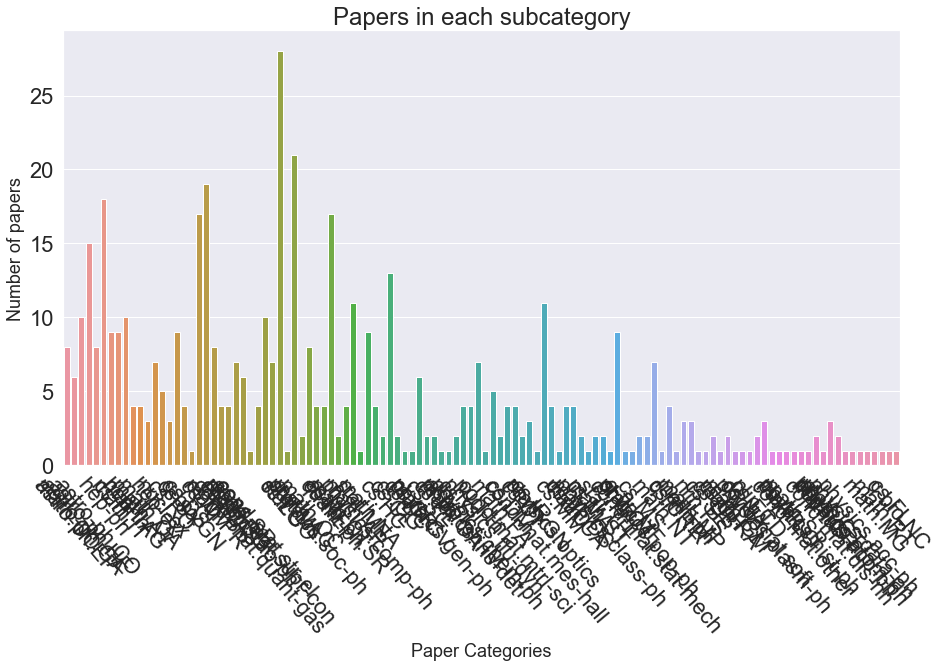

In [58]:
categories = list(expanded_categories_df.iloc[:,1:].columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, expanded_categories_df.iloc[:,1:].sum())

plt.title("Papers in each subcategory", fontsize=24)
plt.ylabel('Number of papers', fontsize=18)
plt.xlabel('Paper Categories', fontsize=18)
plt.xticks(rotation=-50)

plt.show()

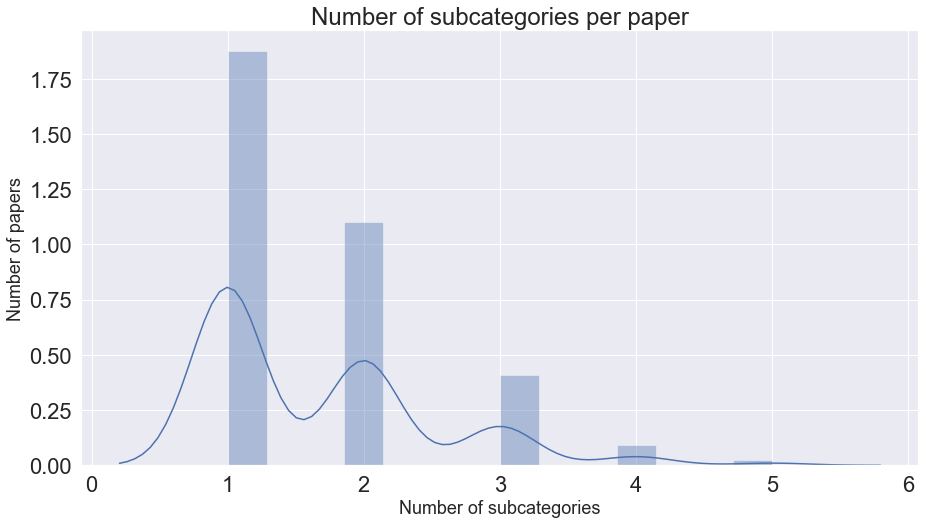

In [80]:
# Categories and subcategories per paper (histogram)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.distplot(expanded_categories_df.iloc[:,1:].sum(axis=1))

plt.title("Number of subcategories per paper", fontsize=24)
plt.ylabel('Number of papers', fontsize=18)
plt.xlabel('Number of subcategories', fontsize=18)

plt.show()

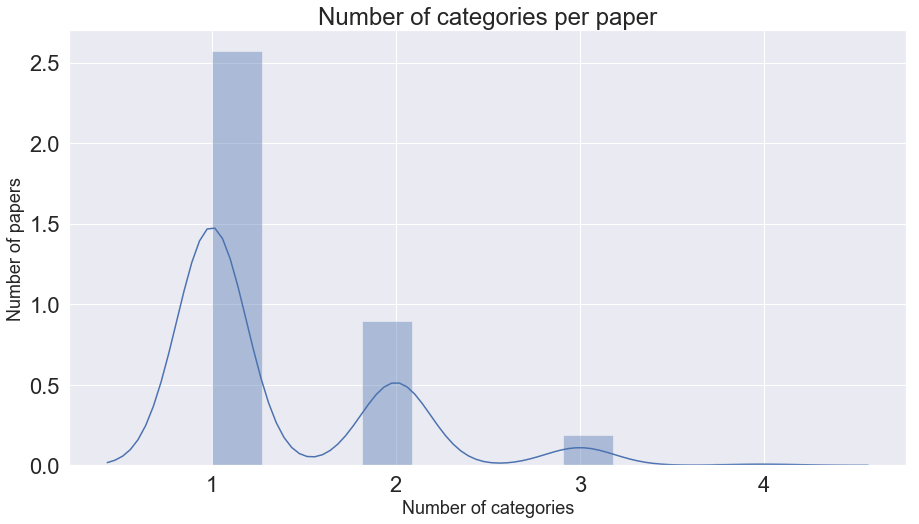

In [81]:
# Categories and subcategories per paper (histogram)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.distplot(reduced_categories_df.iloc[:,1:].sum(axis=1))

plt.title("Number of categories per paper", fontsize=24)
plt.ylabel('Number of papers', fontsize=18)
plt.xlabel('Number of categories', fontsize=18)

plt.show()

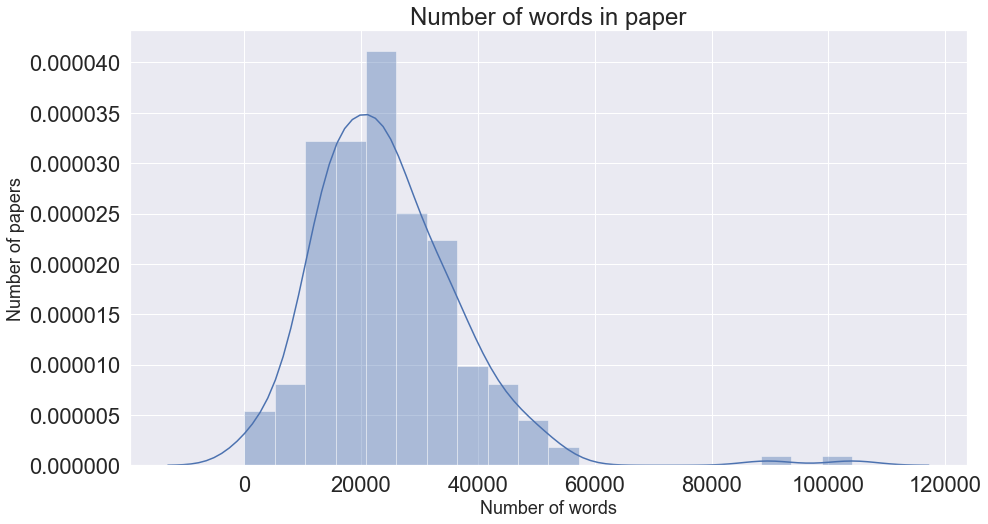

In [110]:
# Categories and subcategories per paper (histogram)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.distplot(text_df['length'],bins=20)

plt.title("Number of words in paper", fontsize=24)
plt.ylabel('Number of papers', fontsize=18)
plt.xlabel('Number of words', fontsize=18)

plt.show()

In [103]:
display(text_df)

,int_paper_id,text,length
1,180900001,enumerate 1 label enumerate 2 label allthmtheo...,1948
2,180900002,universal nightside temperature hot jupiters d...,34548
3,180900003,fig latetime uv emission tdfss van velzen et a...,53730
4,180900004,gravitational lensing power spectrum dark matt...,35739
5,180900005,figures axisymmetric plasma lenses extreme sca...,24496
6,180900006,mergers bhns binaries rates em counterparts me...,48962
7,180900007,utf8gbsnkepler730b probably hot jupiter small ...,4326
8,180900008,,0
9,180900009,calc topathsdecorationsdecorationspathmorphing...,104062
10,180900010,0pt#1schwarzschild black hole mass spin estima...,25922


In [60]:
display(meta_df)

,int_paper_id,paper_id,abstract,authors,title
1,180900001,1809.00001,We prove a weighted generalization of the fo...,Ran J. Tessler,A Cayley-type identity for trees
2,180900002,1809.00002,The nightsides of synchronously rotating pla...,Dylan Keating and Nicolas B. Cowan,A Universal Nightside Temperature on Hot Jupit...
3,180900003,1809.00003,The origin of thermal optical and UV emissio...,"Sjoert van Velzen, Nicholas C. Stone, Brian D....",Late-time UV observations of tidal disruption ...
4,180900004,1809.00004,Strong gravitational lensing has been identi...,"Ana D\'iaz Rivero, Cora Dvorkin, Francis-Yan C...",Gravitational Lensing and the Power Spectrum o...
5,180900005,1809.00005,Frequency-dependent brightness fluctuations ...,"Lingyi Dong, Maria Petropoulou, Dimitrios Gian...",Extreme scattering events from axisymmetric pl...
6,180900006,1809.00006,Black hole-neutron star (BHNS) binaries are ...,"Mukul Bhattacharya, Pawan Kumar, George Smoot",Mergers of black hole-neutron star binaries an...
7,180900007,1809.00007,Here we draw attention to a candidate system...,"Wei Zhu (CITA), Fei Dai, Kento Masuda",Kepler-730b is probably a hot Jupiter with a s...
8,180900008,1809.00008,"In this paper, two different Gray-like maps ...","Minjia Shi (1), Rongsheng Wu (1), Denis S. Kro...",On $Z_pZ_{p^k}$-additive codes and their duality
9,180900009,1809.00009,The product of local operators in a topologi...,"Christopher Beem, David Ben-Zvi, Mathew Bullim...",Secondary products in supersymmetric field theory
10,180900010,1809.00010,We investigate the properties of the most di...,"Samuele Campitiello, Annalisa Celotti, Gabriel...",Black hole mass and spin estimates of the most...


In [61]:
display(categories_df)

,int_paper_id,num_categories,categories
1,180900001,1,[math.CO]
2,180900002,1,[astro-ph.EP]
3,180900003,2,"[astro-ph.HE, astro-ph.GA]"
4,180900004,2,"[astro-ph.CO, hep-ph]"
5,180900005,2,"[astro-ph.GA, astro-ph.HE]"
6,180900006,1,[astro-ph.HE]
7,180900007,1,[astro-ph.EP]
8,180900008,2,"[cs.IT, math.IT]"
9,180900009,4,"[hep-th, math.AG, math.AT, math.QA]"
10,180900010,1,[astro-ph.HE]


In [62]:
display(reduced_categories_df)

,int_paper_id,math,astro-ph,hep-ph,cs,hep-th,hep-ex,nucl-ex,q-bio,eess,physics,cond-mat,stat,quant-ph,nucl-th,gr-qc,q-fin,math-ph,nlin,hep-lat
1,180900001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180900002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,180900003,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,180900004,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,180900005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,180900006,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,180900007,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,180900008,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,180900009,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,180900010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
display(expanded_categories_df)

,int_paper_id,math.CO,astro-ph.EP,astro-ph.GA,astro-ph.HE,astro-ph.CO,hep-ph,cs.IT,math.IT,hep-th,...,math.GT,cond-mat.dis-nn,physics.app-ph,physics.atom-ph,physics.data-an,physics.acc-ph,math.MG,math.RT,cs.FL,q-bio.NC
1,180900001,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180900002,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,180900003,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,180900004,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,180900005,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,180900006,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,180900007,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,180900008,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,180900009,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,180900010,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
